# Plot data basics, metadata
Number of subjects, age, trimester, sex, infer NA sex

In [1]:
library(tidyverse)
library(data.table)
# library(patchwork)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




### 1: Number of subjects

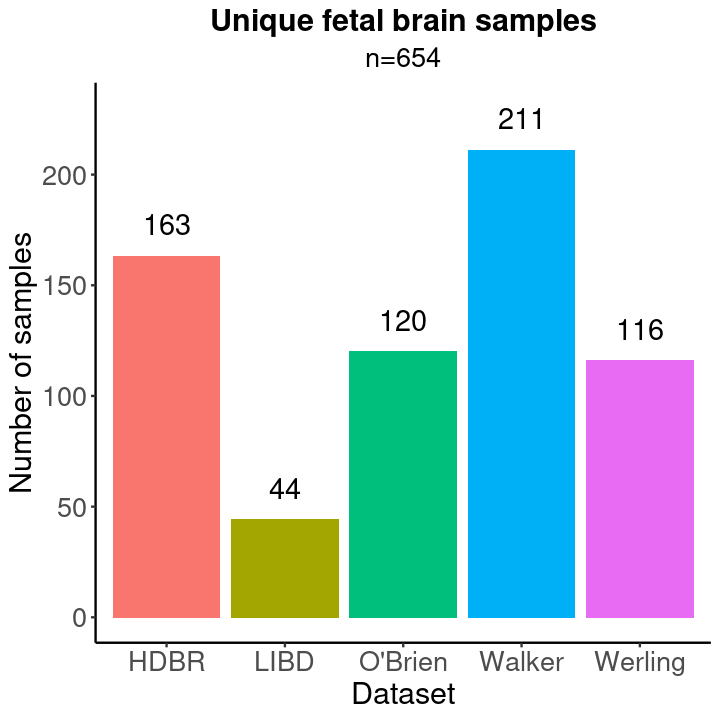

In [23]:
options(repr.plot.width = 6, repr.plot.height = 6)

df <- data.frame("data" = c("Walker", "O'Brien", "Werling", "HDBR", "LIBD"),
                 "count" = c(211, 120, 116, 163, 44))
ggplot(df, aes(x = data, y = count, fill = data)) +
  geom_bar(stat = "identity") +
  labs(x = "Dataset", y = "Number of samples", title = "Unique fetal brain samples", subtitle = "n=654") +
  geom_text(aes(label = count),vjust = -1, size = 6) + 
  theme_classic() +
  theme(axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.title = element_text(size = 18, face="bold", hjust = 0.5),
        plot.subtitle = element_text(size = 16, hjust = 0.5),
        legend.position = "none") +
  ylim(0, 230)

In [24]:
ggsave("../figures/subjects.pdf", width = 6, height = 6)

### 2: Age

In [25]:
metadata_df <- read.table("../metadata_654.tsv", header = T)

In [26]:
head(metadata_df)

,Subject,Age,Sex,inferSex,trimester,ancestry,study
,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>
1,HSB100,-0.4027397,F,F,2,afr,werling
2,HSB152,-0.4602740,M,M,2,eur,werling
3,HSB195,-0.4219178,M,M,2,eur,werling
4,HSB221,-0.4027397,F,F,2,amr,werling
5,HSB222,-0.4823288,F,F,2,eur,werling
6,HSB238,-0.4794521,F,F,2,amr,werling


In [27]:
metadata_df$study <- gsub("werling", "Werling", metadata_df$study)
metadata_df$study <- gsub("walker", "Walker", metadata_df$study)
metadata_df$study <- gsub("obrien", "O'Brien", metadata_df$study)
metadata_df$study <- gsub("libd", "LIBD", metadata_df$study)
metadata_df$study <- gsub("hdbr", "HDBR", metadata_df$study)

In [10]:
for (i in c(13.33, 26.67)) {
    print((i-40)*7/365)
}
for (i in c(13, 26)) {
    print((i-40)*7/365)
}

[1] -0.5114795
[1] -0.2556438
[1] -0.5178082
[1] -0.2684932


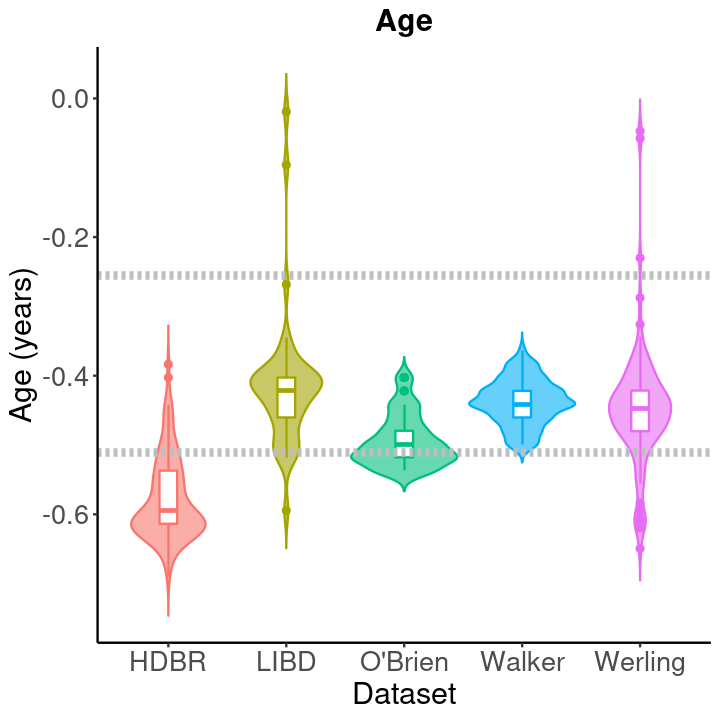

In [28]:
ggplot(metadata_df, aes(x = study, y = Age, fill = study, color = study)) +
  geom_violin(alpha = .6, trim = FALSE) +
  geom_boxplot(width = 0.15, fill = 'white') +
  labs(x = "Dataset", y = "Age (years)", title = "Age") + 
  theme_classic() +
  theme(axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        legend.position = "none") +
  geom_hline(yintercept = -0.5114795, linetype = 'dashed', col = 'grey', size = 1.8) +
  geom_hline(yintercept = -0.2556438, linetype = 'dashed', col = 'grey', size = 1.8)

In [29]:
ggsave("../figures/age.pdf", width = 6, height = 6)

In [3]:
dat <- read.table("metadata_inferSex_trimester_ancestry_629.tsv", header = T)
head(dat)

,Subject,Age,Sex,inferSex,trimester,ancestry
,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>
1,HSB152,-0.4602740,M,M,2,eur
2,HSB195,-0.4219178,M,M,2,eur
3,HSB221,-0.4027397,F,F,2,amr
4,HSB222,-0.4823288,F,F,2,eur
5,HSB238,-0.4794521,F,F,2,amr
6,HSB248,-0.3835616,M,M,2,eur


In [4]:
dat <- dat %>% arrange(Age)
head(dat)

,Subject,Age,Sex,inferSex,trimester,ancestry
,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>
1,11903,-0.6904110,F,F,1,eur
2,11837,-0.6712329,M,M,1,sea
3,11840,-0.6712329,F,F,1,afr
4,11397,-0.6712329,F,F,1,eur
5,11513,-0.6520548,M,M,1,afr
6,11321,-0.6520548,M,M,1,ea


In [8]:
dat$order <- c(1:629)
dat$trimester <- as.factor(dat$trimester)

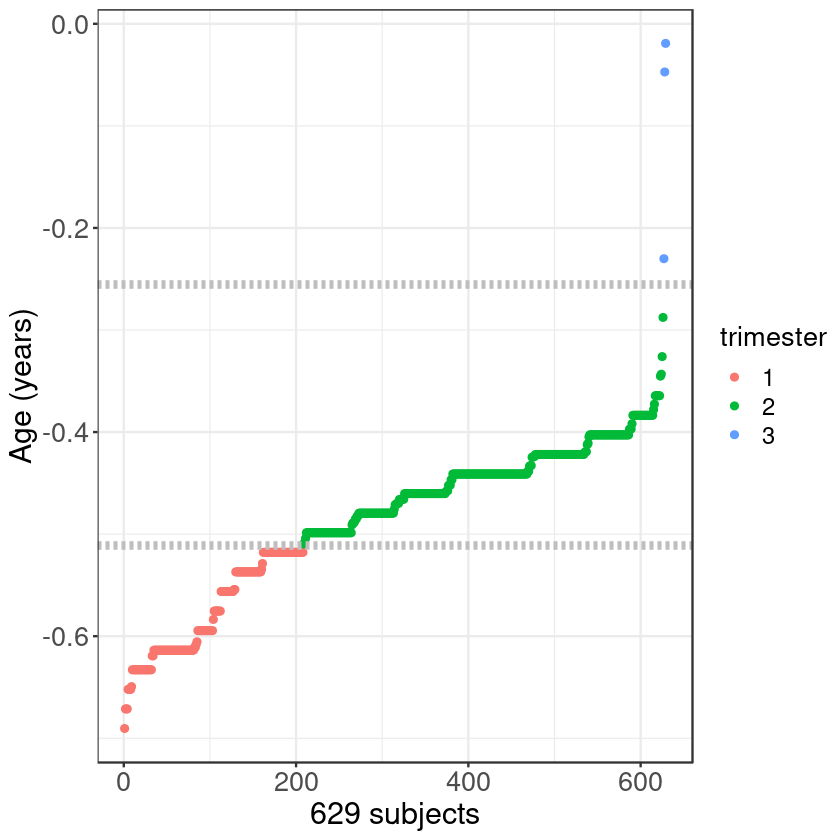

In [13]:
ggplot(dat, aes(x = order, y = Age, color = trimester)) +
geom_point() +
labs(x = "629 subjects", y = "Age (years)") + 
  theme_bw() +
  theme(axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        legend.position = "right",
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14)) +
  geom_hline(yintercept = -0.5114795, linetype = 'dashed', col = 'grey', size = 1.8) +
  geom_hline(yintercept = -0.2556438, linetype = 'dashed', col = 'grey', size = 1.8)

In [5]:
dat <- read.table("metadata_inferSex_trimester_ancestry_629.tsv", header = T)
dat <- dat %>% filter(ancestry == "eur")

In [6]:
dim(dat)

[1] 280   6

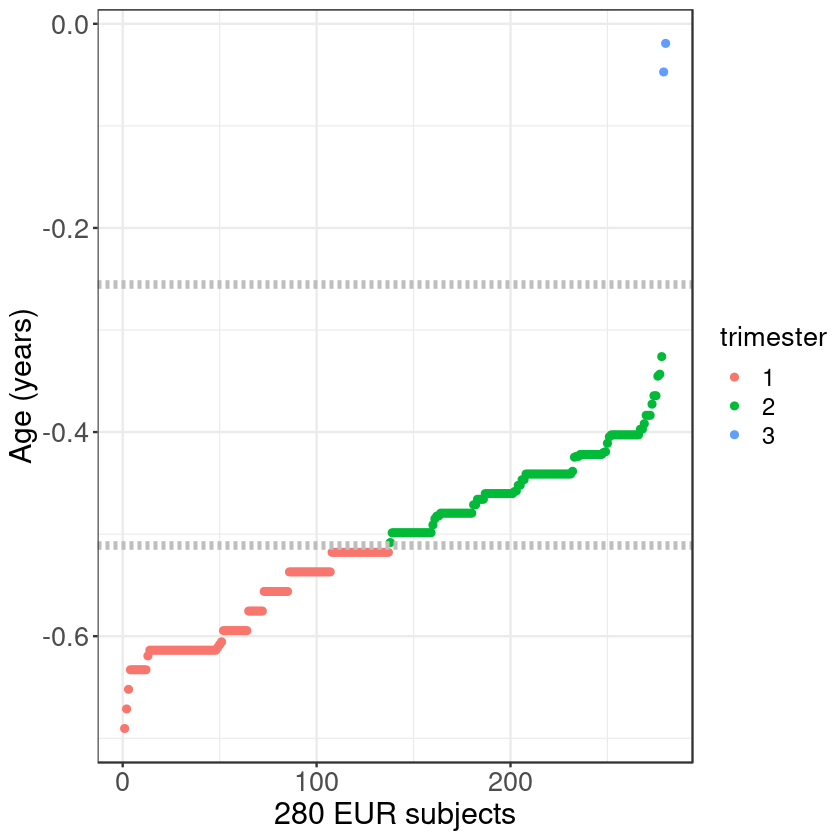

In [7]:
dat <- dat %>% arrange(Age)
dat$order <- c(1:280)
dat$trimester <- as.factor(dat$trimester)
ggplot(dat, aes(x = order, y = Age, color = trimester)) +
geom_point() +
labs(x = "280 EUR subjects", y = "Age (years)") + 
  theme_bw() +
  theme(axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        legend.position = "right",
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14)) +
  geom_hline(yintercept = -0.5114795, linetype = 'dashed', col = 'grey', size = 1.8) +
  geom_hline(yintercept = -0.2556438, linetype = 'dashed', col = 'grey', size = 1.8)

### 3: Trimester

In [30]:
table(metadata_df$trimester)


  1   2   3 
216 433   5 

In [31]:
metadata_df <- metadata_df %>% mutate(pcw = Age*365/7+40)

In [32]:
range(metadata_df$pcw)

[1]  4 39

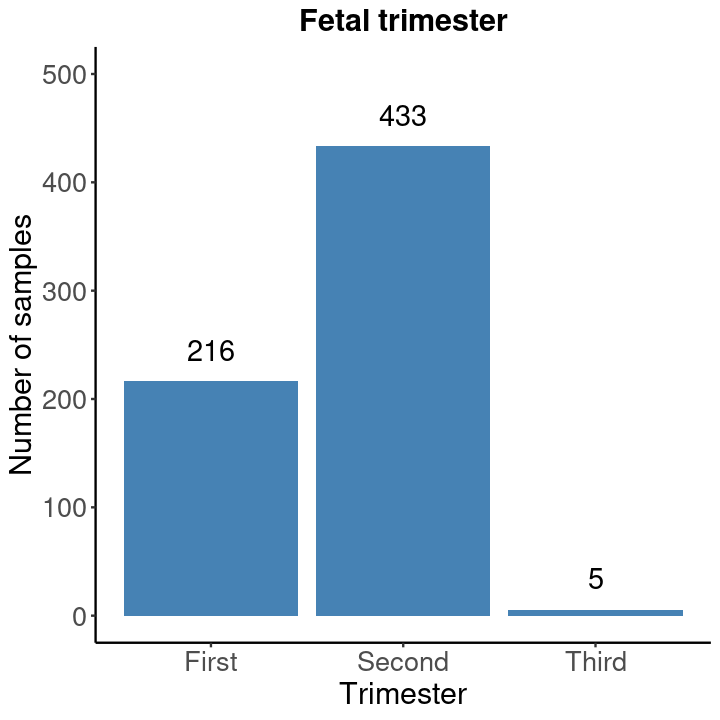

In [33]:
tri_df <- data.frame("Trimester" = c("First","Second","Third"),
                     "Count" = c(216, 433, 5))

ggplot(tri_df, aes(x = Trimester, y = Count)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  geom_text(aes(label = Count),vjust = -1, size = 6) +
  labs(title = "Fetal trimester", x = "Trimester", y = "Number of samples") +
  theme_classic() +
  theme(axis.text=element_text(size = 16), 
        axis.title=element_text(size = 18), 
        plot.title = element_text(size = 18, face="bold", hjust = 0.5)) +
  ylim(0, 500)

In [34]:
ggsave("../figures/trimester.pdf", width = 6, height = 6)

### 4: Sex

In [35]:
head(metadata_df)

,Subject,Age,Sex,inferSex,trimester,ancestry,study,pcw
,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>
1,HSB100,-0.4027397,F,F,2,afr,Werling,19.00
2,HSB152,-0.4602740,M,M,2,eur,Werling,16.00
3,HSB195,-0.4219178,M,M,2,eur,Werling,18.00
4,HSB221,-0.4027397,F,F,2,amr,Werling,19.00
5,HSB222,-0.4823288,F,F,2,eur,Werling,14.85
6,HSB238,-0.4794521,F,F,2,amr,Werling,15.00


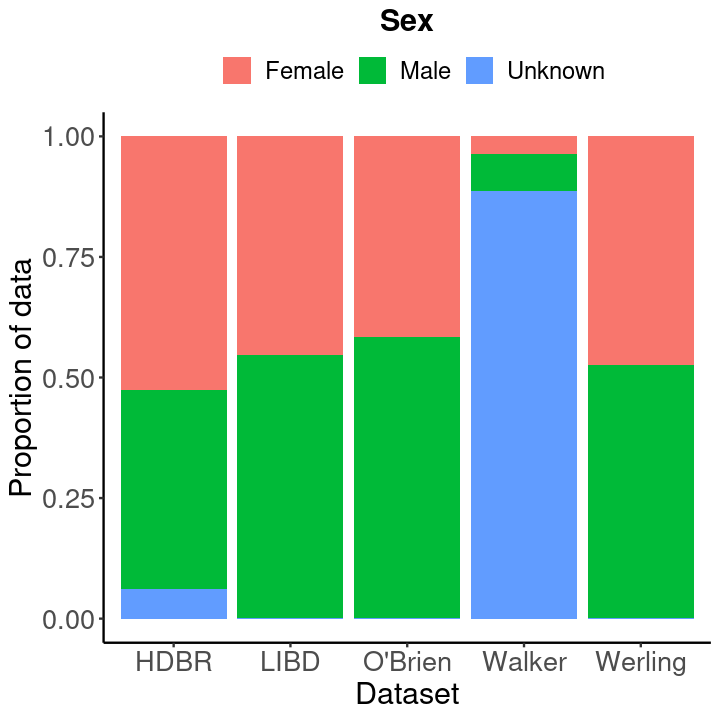

In [44]:
sex_df <- data.frame("data" = c(rep("Walker",3), rep("O'Brien",3), rep("Werling",3), rep("HDBR",3), rep("LIBD",3)),
                     "sex" = rep(c("F","M","unknown"),5),
                     "count" = rep(NA, 15))

for (i in c("Walker", "O'Brien", "Werling", "HDBR", "LIBD")) {
  sex_df[which(sex_df$data == i)[1],"count"] <- sum(metadata_df$study == i & metadata_df$Sex =="F", na.rm = TRUE)
  sex_df[which(sex_df$data == i)[2],"count"] <- sum(metadata_df$study == i & metadata_df$Sex =="M", na.rm = TRUE)
  sex_df[which(sex_df$data == i)[3],"count"] <- sum(is.na(metadata_df[metadata_df$study == i, "Sex"]))
}

ggplot(sex_df, aes(x = data, fill = sex, y = count)) +
  geom_bar(position = "fill", stat = "identity") +
  labs(title = "Sex", x = "Dataset", y = "Proportion of data", fill = "") +
  theme_classic() +
  theme(axis.text=element_text(size = 16), 
        axis.title=element_text(size = 18), 
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
       legend.text = element_text(size = 14),
        legend.title = element_text(size = 16),
         legend.position = "top") +
  scale_fill_discrete(labels = c("Female", "Male", "Unknown"))

In [46]:
ggsave("../figures/sex.pdf", width = 6, height = 6)

### 5: Infer sex (on 654 subjects with gene expression)
- XIST is female determining
- There are several genes on Y that are also on X (pseudo autosomal), should use PC1 of the non pseudo autosomal y genes (non PAR). Otherwise, no difference between sexes

In [47]:
gene_expr <- fread("../../salmon/expression.final/gene.TPM.tsv", data.table = F)
rownames(gene_expr) <- gene_expr$V1
gene_expr <- gene_expr[,-1]

Warning message in fread("../../salmon/expression.final/gene.TPM.tsv", data.table = F):
“Detected 654 column names but the data has 655 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


In [48]:
gencode <- fread("../../salmon/gencode.v33lift37.annotation.gene.tsv", data.table = F)

**First extract chrY non PAR genes**

In [49]:
y_gene <- gencode %>% filter(V1 == "chrY")

In [50]:
dim(y_gene)

[1] 584   9

In [51]:
keep <- !grepl("PAR", y_gene[,"V9"])
y_gene_nonPAR <- y_gene[keep,]

In [52]:
dim(y_gene_nonPAR)

[1] 534   9

In [53]:
y_gene_nonPAR_id <- c()
for (i in 1:nrow(y_gene_nonPAR)) {
  temp <- strsplit(y_gene_nonPAR[i,"V9"], split = " ")[[1]][2]
  y_gene_nonPAR_id[i] <- substr(temp, 2, nchar(temp)-2)
}

In [54]:
y_expr <- gene_expr[which(rownames(gene_expr) %in% y_gene_nonPAR_id),]
y_expr <- log2(.1 + y_expr)
y_expr_t <- as.data.frame(t(y_expr))

In [55]:
dim(y_expr)

[1] 483 654

**Now substract XIST**

In [56]:
xist_expr <- gene_expr["ENSG00000229807.12_6",]

In [57]:
xist_expr <- log2(.1+xist_expr)

**Now run PCA on chrY gene expression**

In [58]:
pca <- prcomp(y_expr_t[,which(apply(y_expr_t, 2, var) != 0)], scale. = TRUE)

In [59]:
head(metadata_df)

,Subject,Age,Sex,inferSex,trimester,ancestry,study,pcw
,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>
1,HSB100,-0.4027397,F,F,2,afr,Werling,19.00
2,HSB152,-0.4602740,M,M,2,eur,Werling,16.00
3,HSB195,-0.4219178,M,M,2,eur,Werling,18.00
4,HSB221,-0.4027397,F,F,2,amr,Werling,19.00
5,HSB222,-0.4823288,F,F,2,eur,Werling,14.85
6,HSB238,-0.4794521,F,F,2,amr,Werling,15.00


In [42]:
# I have already inferred sex. Here just to make plots
# meta <- read.table("metadata_inferSex.tsv", header = T, stringsAsFactors = F)

In [60]:
metadata_df$xist <- NA
for (i in 1:nrow(metadata_df)) {
  metadata_df[i,"xist"] <- xist_expr[1, metadata_df[i,"Subject"]]
}  

metadata_df$ygenePC1 <- NA
for (i in 1:nrow(metadata_df)) {
  metadata_df[i, "ygenePC1"] <- pca$x[metadata_df[i,"Subject"],1]
}

Warning message:
“Removed 4 rows containing missing values (geom_point).”


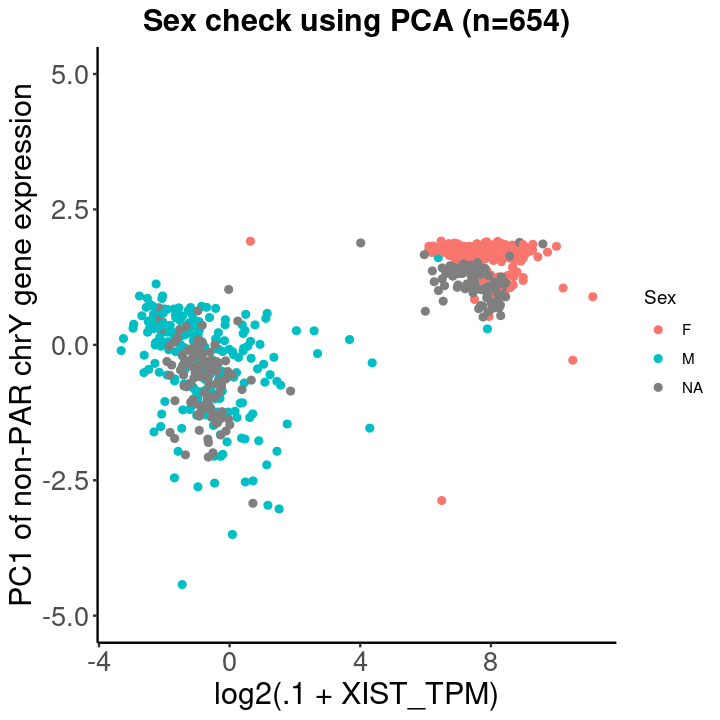

In [61]:
ggplot(metadata_df, aes(x = xist, y = ygenePC1, color = Sex)) +
  geom_point() +
  labs(x = "log2(.1 + XIST_TPM)",
       y = "PC1 of non-PAR chrY gene expression",
       title = "Sex check using PCA (n=654)",
       color = "Sex") +
  theme_classic() +
  theme(axis.text = element_text(size=16),
        axis.title = element_text(size=18),
        plot.title = element_text(size=18, face="bold", hjust = 0.5)) +
  ylim(-5, 5)

**Alternatively, MDS on chrY gene expression**

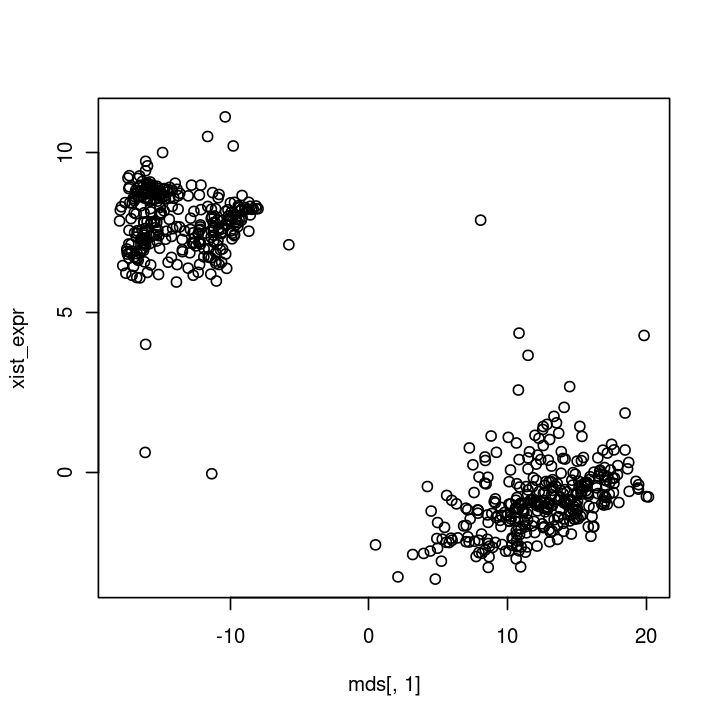

In [62]:
mds <- cmdscale(dist(y_expr_t))
plot(mds[,1], xist_expr)

In [63]:
metadata_df$ygeneMDS1 <- NA
for (i in 1:nrow(metadata_df)) {
  metadata_df[i, "ygeneMDS1"] <- mds[metadata_df[i,"Subject"],1]
}

In [64]:
head(metadata_df)

,Subject,Age,Sex,inferSex,trimester,ancestry,study,pcw,xist,ygenePC1,ygeneMDS1
,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,HSB100,-0.4027397,F,F,2,afr,Werling,19.00,6.592317,1.7809956,-16.169361
2,HSB152,-0.4602740,M,M,2,eur,Werling,16.00,1.446716,-0.6727377,12.574748
3,HSB195,-0.4219178,M,M,2,eur,Werling,18.00,-2.074049,0.8555520,5.295721
4,HSB221,-0.4027397,F,F,2,amr,Werling,19.00,7.125516,1.4133382,-5.761925
5,HSB222,-0.4823288,F,F,2,eur,Werling,14.85,7.158714,1.8246400,-16.251994
6,HSB238,-0.4794521,F,F,2,amr,Werling,15.00,7.790590,1.7720798,-15.703711


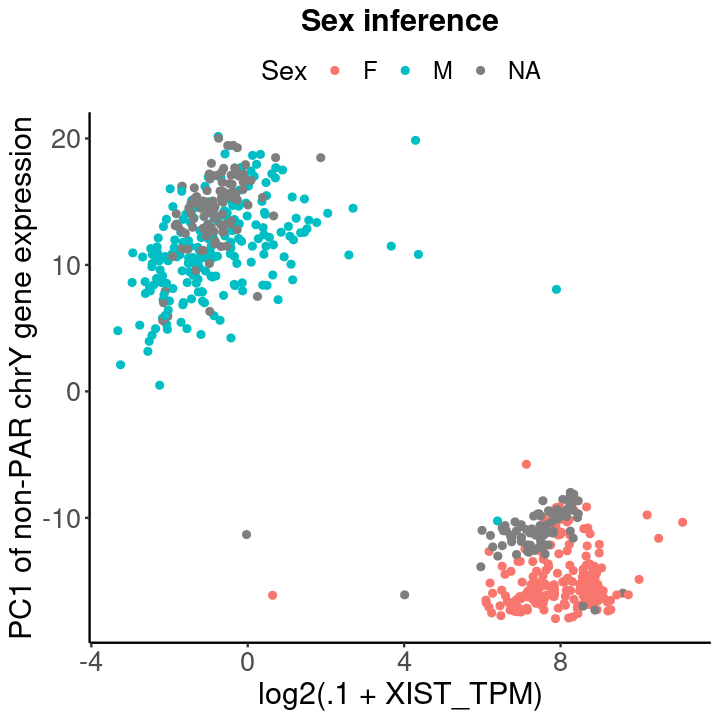

In [65]:
ggplot(metadata_df, aes(x = xist, y = ygeneMDS1, color = Sex)) +
  geom_point() +
  labs(x = "log2(.1 + XIST_TPM)",
       y = "PC1 of non-PAR chrY gene expression",
       title = "Sex inference",
       color = "Sex") +
  theme_classic() +
  theme(axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
       legend.text = element_text(size = 14),
        legend.title = element_text(size = 16),
         legend.position = "top") 

In [66]:
ggsave("../figures/sex_check.pdf", width = 6, height = 6)

**Now, infer NA sex**
- I've already done this, here just to check and make plot

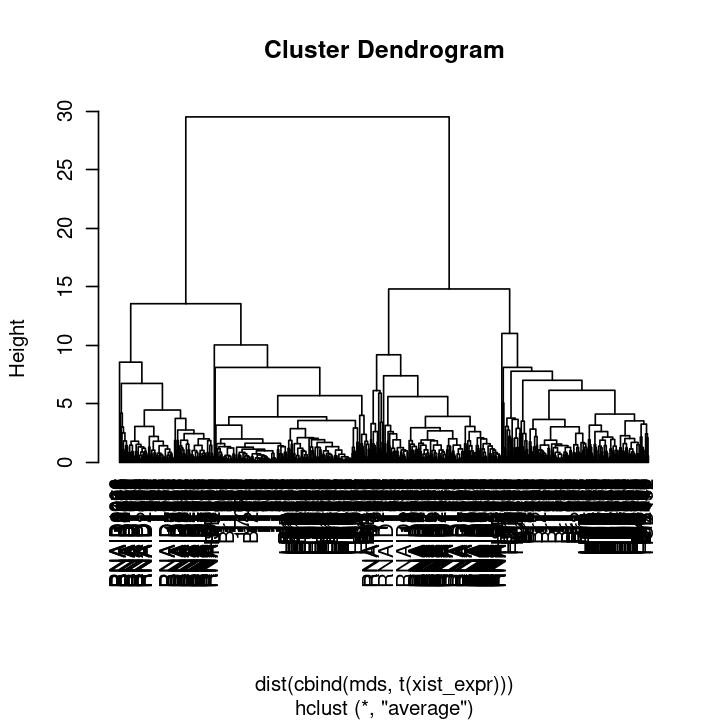

In [67]:
hc <- hclust(dist(cbind(mds, t(xist_expr))), method = "average")
plot(hc, hang = -1)

In [68]:
sub_group <- cutree(hc, k = 2)
table(sub_group)

sub_group
  1   2 
344 310 

In [32]:
# plot.new()
# rect.hclust(hc, k = 2, border = 2:3)

In [69]:
metadata_df$inferSex2 <- NA
for(i in 1:nrow(metadata_df)){
  if (sub_group[metadata_df[i, "Subject"]] == 1) {
    metadata_df[i, "inferSex2"] <- "M"
  }
  else if (sub_group[metadata_df[i, "Subject"]] == 2) {
    metadata_df[i, "inferSex2"] <- "F"
  }
  
}

In [70]:
# Check: am I getting the same results as before?
sum(metadata_df$inferSex != metadata_df$inferSex2)

[1] 0

In [72]:
head(metadata_df)

,Subject,Age,Sex,inferSex,trimester,ancestry,study,pcw,xist,ygenePC1,ygeneMDS1,inferSex2
,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,HSB100,-0.4027397,F,F,2,afr,Werling,19.00,6.592317,1.7809956,-16.169361,F
2,HSB152,-0.4602740,M,M,2,eur,Werling,16.00,1.446716,-0.6727377,12.574748,M
3,HSB195,-0.4219178,M,M,2,eur,Werling,18.00,-2.074049,0.8555520,5.295721,M
4,HSB221,-0.4027397,F,F,2,amr,Werling,19.00,7.125516,1.4133382,-5.761925,F
5,HSB222,-0.4823288,F,F,2,eur,Werling,14.85,7.158714,1.8246400,-16.251994,F
6,HSB238,-0.4794521,F,F,2,amr,Werling,15.00,7.790590,1.7720798,-15.703711,F


In [73]:
# 2 subjects have inconsistent sex
# according to figure, use inferred sex
count <- 0
for (i in 1:nrow(metadata_df)) {
  if(! is.na(metadata_df[i, "Sex"])) {
    if(metadata_df[i, "Sex"] != metadata_df[i, "inferSex2"]) {
      count <- count +1
    }
  }
}
count

# write.table(meta, "metadata_inferSex.tsv", col.names = T, row.names = F, quote = F, sep = "\t")

[1] 2

In [74]:
metadata_df %>% filter(Sex != inferSex2)

Subject,Age,Sex,inferSex,trimester,ancestry,study,pcw,xist,ygenePC1,ygeneMDS1,inferSex2
<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
HSB289,-0.5082192,M,F,2,eur,Werling,13.5,6.388101,1.608789,-10.24337,F
11820,-0.5945205,M,F,1,amr,HDBR,9.0,8.824215,1.740431,-15.94455,F


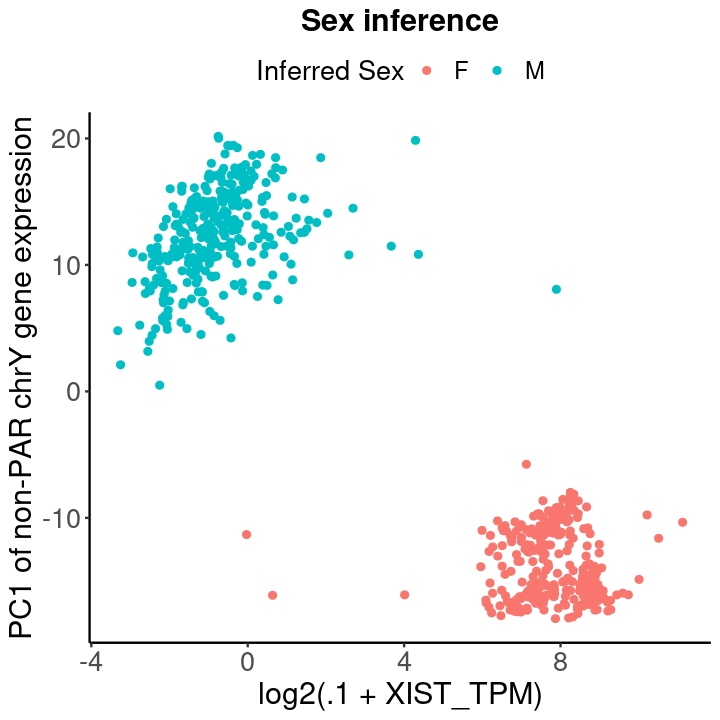

In [75]:
ggplot(metadata_df, aes(x = xist, y = ygeneMDS1, color = inferSex)) +
  geom_point() +
  labs(x = "log2(.1 + XIST_TPM)",
       y = "PC1 of non-PAR chrY gene expression",
       title = "Sex inference",
       color = "Inferred Sex") +
  theme_classic() +
  theme(axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
       legend.text = element_text(size = 14),
        legend.title = element_text(size = 16),
         legend.position = "top") 

In [76]:
ggsave("../figures/sex_check_inferred.pdf", width = 6, height = 6)

In [77]:
sex_df <- data.frame("data" = c(rep("Walker",2), rep("O'Brien",2), rep("Werling",2), rep("HDBR",2), rep("LIBD",2)),
                     "sex" = rep(c("F","M"),5),
                     "count" = rep(NA, 10))
for (i in c("Walker", "O'Brien", "Werling", "HDBR", "LIBD")) {
  sex_df[which(sex_df$data == i)[1],"count"] <- sum(metadata_df$study == i & metadata_df$inferSex =="F")
  sex_df[which(sex_df$data == i)[2],"count"] <- sum(metadata_df$study == i & metadata_df$inferSex =="M")
}

In [78]:
head(sex_df)

,data,sex,count
,<chr>,<chr>,<int>
1,Walker,F,92
2,Walker,M,119
3,O'Brien,F,50
4,O'Brien,M,70
5,Werling,F,56
6,Werling,M,60


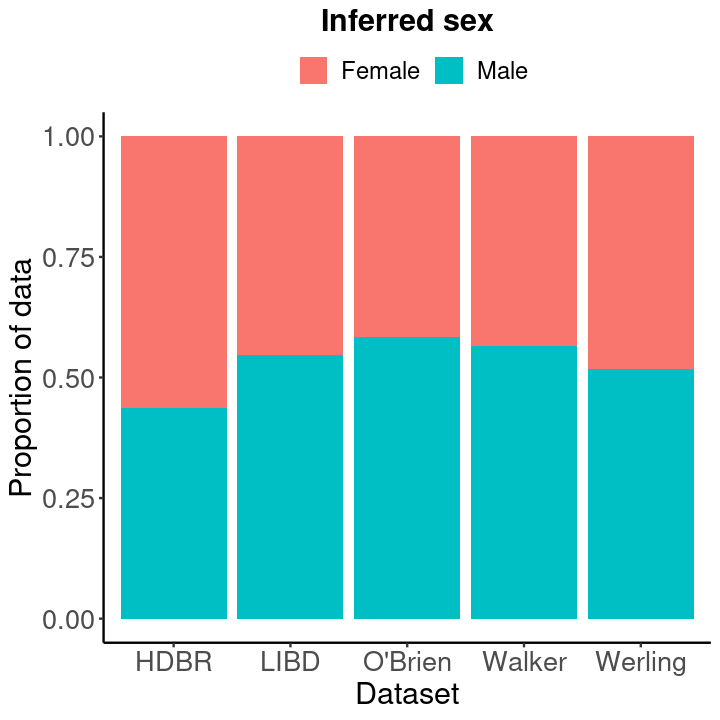

In [80]:
ggplot(sex_df, aes(x = data, fill = sex, y = count)) +
  geom_bar(position = "fill", stat = "identity") +
  labs(title = "Inferred sex", x = "Dataset", y = "Proportion of data",
       fill = "") +
  theme_classic() +
  theme(axis.text=element_text(size = 16), 
        axis.title=element_text(size = 18), 
        plot.title = element_text(size = 18, face="bold", hjust = 0.5),
       legend.text = element_text(size = 14),
        legend.title = element_text(size = 16),
         legend.position = "top") +
  scale_fill_discrete(labels = c("Female", "Male"))

In [81]:
ggsave("../figures/sex_inferred.pdf", height = 6, width = 6)

In [63]:
# options(repr.plot.width = 21, repr.plot.height = 14)

# p <- p1 + p2 + p3 + p6 + p8 +
#     plot_layout(ncol = 3) 
# #     plot_annotation(tag_level = 'A') &
# #         theme(plot.tag = element_text(size = 18, face = "bold"))
# p

In [64]:
# ggsave("figures/supp.png", p, width = 21, height = 14)